In [2]:
import pandas_datareader as pdr
import pandas as pd

import json
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import h5py as h5
import matplotlib.pyplot as plt
import seaborn as sns

###creating lstm model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

import tensorflow as tf


import math
from sklearn.metrics import mean_squared_error


In [8]:
df = pd.read_json('C:\\Users\\SBS\IMPORTED_DATA\\ta.json')
#df
df.head(10)
#df['instrument'].apply(pd.Series)

,_id,interRSI,interBollingerBands,interROC,interMACD,interMOM,ADL,price,instrument,date,WEMA,OBV,RSI,ROC,MOM,ATR,Stochastic,WilliamsR,BollingerBands,MACD
0,{'$oid': '61fe0c065e2f1c1a60016390'},0,0,0,0,0,1350000,55.50,ASSUR MAGHREBIA,{'$date': '2020-12-29T00:00:00Z'},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,{'$oid': '61fe0c065e2f1c1a60016395'},0,0,0,0,0,1580599,62.50,ASSUR MAGHREBIA,{'$date': '2022-01-10T00:00:00Z'},59.772000,253847.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,{'$oid': '61fe0c065e2f1c1a6001639a'},0,0,0,0,0,1582877,62.84,ASSUR MAGHREBIA,{'$date': '2022-01-17T00:00:00Z'},61.625449,255718.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,{'$oid': '61fe0c065e2f1c1a6001639f'},0,0,-1,0,-1,1585797,62.30,ASSUR MAGHREBIA,{'$date': '2022-01-28T00:00:00Z'},62.005491,254510.0,66.75,-0.240192,"{'MOM': -1.200000000000002, 'EmaMOM': -0.01946...",1.968316,"{'k': 75.23510971786827, 'd': 80.02271409880136}",-24.764890,NaN,NaN
4,{'$oid': '61fe0c065e2f1c1a60016392'},0,0,0,0,0,1580176,57.50,ASSUR MAGHREBIA,{'$date': '2020-12-31T00:00:00Z'},NaN,254078.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,{'$oid': '61fe0c065e2f1c1a60016397'},0,0,0,0,0,1580623,61.00,ASSUR MAGHREBIA,{'$date': '2022-01-12T00:00:00Z'},60.534080,253871.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,{'$oid': '61fe0c065e2f1c1a6001639c'},0,0,0,0,0,1583187,62.78,ASSUR MAGHREBIA,{'$date': '2022-01-19T00:00:00Z'},61.612287,256020.0,NaN,13.117117,"{'MOM': 6.280000000000001, 'EmaMOM': 0.1026809...",NaN,NaN,NaN,NaN,NaN
7,{'$oid': '61fe0c065e2f1c1a600163a1'},0,0,0,0,0,1585808,62.20,ASSUR MAGHREBIA,{'$date': '2022-02-01T00:00:00Z'},62.089914,254499.0,66.34,-0.480000,"{'MOM': -0.799999999999997, 'EmaMOM': -0.01294...",1.789977,"{'k': 61.76470588235301, 'd': 64.97877451224306}",-38.235294,NaN,NaN
8,{'$oid': '61fe0c065e2f1c1a60016393'},0,0,0,0,0,1580021,62.45,ASSUR MAGHREBIA,{'$date': '2022-01-06T00:00:00Z'},NaN,254233.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,{'$oid': '61fe0c065e2f1c1a60016398'},0,0,0,0,0,1581185,63.00,ASSUR MAGHREBIA,{'$date': '2022-01-13T00:00:00Z'},61.027264,254486.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#df = df.reset_index()  # make sure indexes pair with number of rows
nbr=0
df3 = []
instru = "AIR LIQUDE TSIE"
for ind in df.index:
    #ASSUR MAGHREBIA
    #AIR LIQUDE TSIE
    if (df['instrument'][ind] == instru):
        nbr = nbr +1
        print(df['instrument'][ind], df['price'][ind])
        
        df2 = df['RSI'][ind]
        df3.append(df2)
     #print(df['instrument'][ind], df['price'][ind] 
print ('********************************************************')

df_instru=pd.DataFrame(df3)

AIR LIQUDE TSIE 414.0
AIR LIQUDE TSIE 414.0
AIR LIQUDE TSIE 414.0
AIR LIQUDE TSIE 419.95
AIR LIQUDE TSIE 419.94
AIR LIQUDE TSIE 420.01
AIR LIQUDE TSIE 420.01
AIR LIQUDE TSIE 423.0
AIR LIQUDE TSIE 429.89
AIR LIQUDE TSIE 430.0
AIR LIQUDE TSIE 421.0
AIR LIQUDE TSIE 433.59
AIR LIQUDE TSIE 440.0
AIR LIQUDE TSIE 440.0
AIR LIQUDE TSIE 440.0
AIR LIQUDE TSIE 450.0
AIR LIQUDE TSIE 459.99
AIR LIQUDE TSIE 459.99
AIR LIQUDE TSIE 450.0
AIR LIQUDE TSIE 460.0
AIR LIQUDE TSIE 459.99
AIR LIQUDE TSIE 459.99
AIR LIQUDE TSIE 459.99
AIR LIQUDE TSIE 460.0
AIR LIQUDE TSIE 450.01
AIR LIQUDE TSIE 450.0
AIR LIQUDE TSIE 461.0
AIR LIQUDE TSIE 463.5
AIR LIQUDE TSIE 467.79
AIR LIQUDE TSIE 467.8
AIR LIQUDE TSIE 469.78
AIR LIQUDE TSIE 469.88
AIR LIQUDE TSIE 469.9
AIR LIQUDE TSIE 470.2
AIR LIQUDE TSIE 479.9
AIR LIQUDE TSIE 500.0
AIR LIQUDE TSIE 501.01
AIR LIQUDE TSIE 503.0
AIR LIQUDE TSIE 518.01
AIR LIQUDE TSIE 538.5
AIR LIQUDE TSIE 545.0
AIR LIQUDE TSIE 576.8
AIR LIQUDE TSIE 602.75
AIR LIQUDE TSIE 576.99
AIR LIQUDE TS

In [13]:
df_instru

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1620,40.65
1621,59.46
1622,36.20
1623,39.72


In [14]:
#using only !nan inputs
nbr = 0
df3 = []
for ind in df_instru.index:
    if (not pd.isna(df_instru[0][ind])):
        #print(df_instru[0][ind])
        nbr = nbr + 1
        df3.append(df_instru[0][ind])

print("nbr of !nan inputs ", nbr)
df4= pd.DataFrame(df3)

nbr of !nan inputs  1611


In [7]:
df4

,0
0,79.53
1,83.56
2,86.43
3,86.43
4,71.88
...,...
1606,40.65
1607,59.46
1608,36.20
1609,39.72


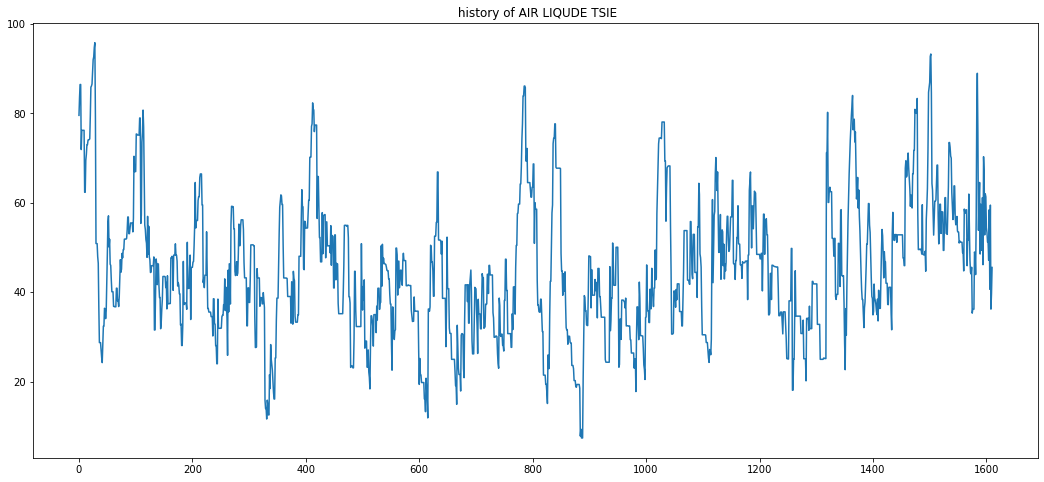

In [8]:
#visualize  data
plt.figure(figsize=(18,8))
title = "history of " + instru
plt.title(title)
plt.plot(df4)
plt.show()

In [9]:
#SCALING DATA ACCORDING TO LSTM MODEL -- Sigmoid limit
scaler=MinMaxScaler(feature_range=(0,1))
df4 = scaler.fit_transform(np.array(df4).reshape(-1,1))

## Splitting dataset into train and test split : 

In [10]:
# 65% (0.65) of dataframe being training size
training_size = int(len(df4)*0.65)

#the rest assigned to test size 
test_size = len(df4)-training_size 

train_data,test_data=df4[0:training_size,:],df4[training_size:len(df4),:1]

In [11]:
training_size,test_size

(1047, 564)

In [12]:
#convert array of values into a dataset matrix

def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i + time_step), 0] 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
# reshape into X=t, t+3, t+2, ... and Y=t+4
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(Y_train.shape)

(946, 100)
(946,)


(None, None)

## Reshape input to be [samples, time_steps, features]  ==> required for LSTM models

In [15]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Create LSTM MODEL

In [16]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
15/15 [==============================] - 5s 158ms/step - loss: 0.0568 - val_loss: 0.0394
Epoch 2/100
15/15 [==============================] - 2s 106ms/step - loss: 0.0226 - val_loss: 0.0182
Epoch 3/100
15/15 [==============================] - 2s 102ms/step - loss: 0.0182 - val_loss: 0.0182
Epoch 4/100
15/15 [==============================] - 2s 107ms/step - loss: 0.0166 - val_loss: 0.0207
Epoch 5/100
15/15 [==============================] - 1s 100ms/step - loss: 0.0151 - val_loss: 0.0229
Epoch 6/100
15/15 [==============================] - 2s 103ms/step - loss: 0.0132 - val_loss: 0.0189
Epoch 7/100
15/15 [==============================] - 1s 98ms/step - loss: 0.0125 - val_loss: 0.0187
Epoch 8/100
15/15 [==============================] - 1s 98ms/step - loss: 0.0121 - val_loss: 0.0189
Epoch 9/100
15/15 [==============================] - 2s 101ms/step - loss: 0.0114 - val_loss: 0.0190
Epoch 10/100
15/15 [==============================] - 2s 101ms/step - loss: 0.0107 - val_loss

In [19]:
### Prediction and performance metrics check
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [20]:
##transform back to original form before scaling
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [21]:
## Calculating RMSE ( root mean squared error / regression metrics)  performance metrics
math.sqrt(mean_squared_error(Y_train,train_predict))

44.74848809236126

In [22]:
### test data RMSE
math.sqrt(mean_squared_error(Y_test, test_predict))

51.492359231543006

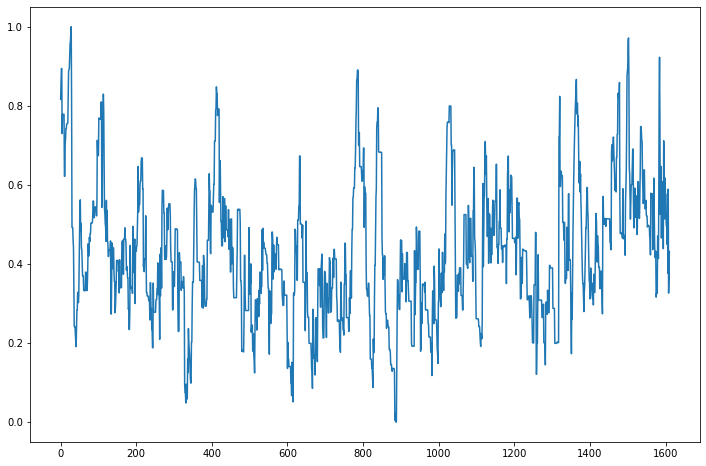

In [23]:
plt.figure(figsize=(12,8))
plt.plot(df4)

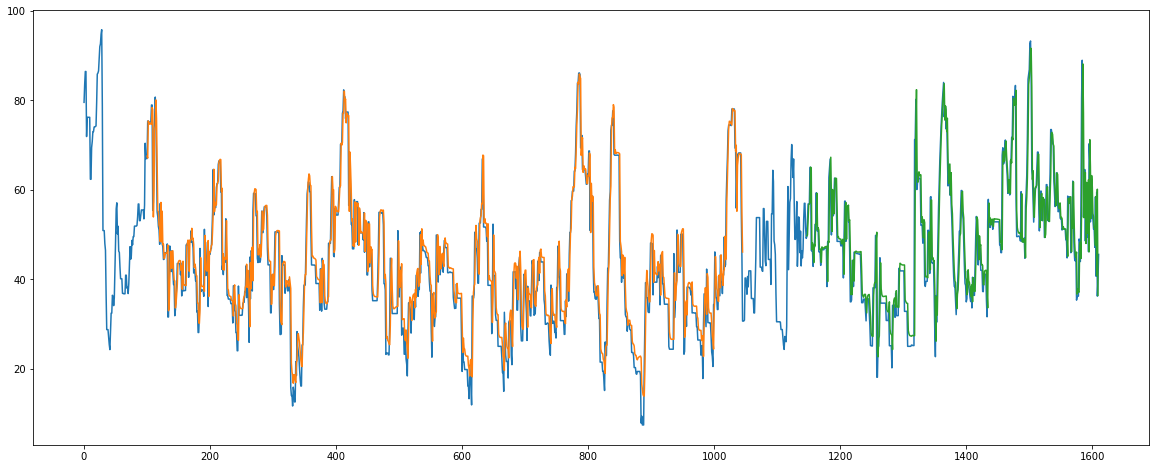

In [24]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df4)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df4)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df4)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(20,8))
plt.plot(scaler.inverse_transform(df4))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

plt.show()

In [25]:
len(test_data)

564

In [26]:
#taking 100 test data
x_input = test_data[464:].reshape(1,-1)
x_input.shape

(1, 100)

In [27]:
#converting inputs to list 
temp_input = list(x_input)
temp_input=temp_input[0].tolist()

## Prediction for next 30 days

In [28]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.42921704]
101
1 day input [0.64642009 0.69041964 0.69041964 0.56023074 0.4910078  0.54416921
 0.59144893 0.59144893 0.5174754  0.57199412 0.57199412 0.57199412
 0.47460694 0.47460694 0.5476756  0.60807601 0.60807601 0.51770162
 0.5174754  0.5151001  0.57979867 0.63522226 0.74742676 0.74742676
 0.73555028 0.71304151 0.70817781 0.62097048 0.58873431 0.55265241
 0.56803529 0.63793688 0.63759756 0.5585341  0.53941862 0.54394299
 0.56057007 0.52335709 0.52098179 0.52098179 0.49326999 0.49869924
 0.49564529 0.49564529 0.49530596 0.49530596 0.46861215 0.46861215
 0.42268974 0.57912001 0.56905327 0.56905327 0.57731026 0.57731026
 0.43581043 0.5053727  0.50084832 0.61712476 0.52776835 0.45051465
 0.41929646 0.41488519 0.43196471 0.31591449 0.32598122 0.32598122
 0.32598122 0.47053501 0.46533198 0.41341477 0.55355729 0.82603778
 0.92263319 0.77276326 0.52539306 0.59902726 0.64642009 0.46544509
 0.59144893 0.57199412 0.47460694 0.60807601 0.43841194 0.71157109
 0.66858953 0.51374279 0.61769031

In [29]:
#The arange ====> ([start,] stop[, step,][, dtype]) : Returns an array with evenly spaced elements as per the interval. The interval mentioned is half-opened i.e. [Start, Stop) 
day_new = np.arange(1,101)
day_pred=np.arange(101,131)

In [30]:
len(df4)

1611

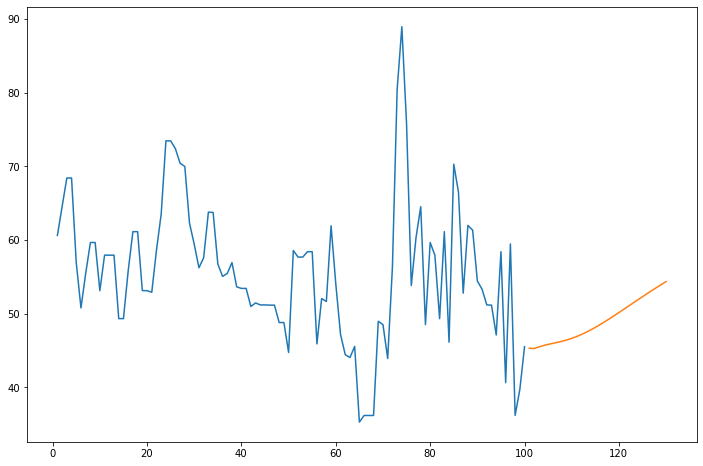

In [31]:
# import matplotlib.pyplot as plt ==> imported top

plt.figure(figsize=(12,8))
plt.plot(day_new,scaler.inverse_transform(df4[1511:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))